# Working With Time Series in Pandas

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

## Import Libraries

In [374]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

## San Francisco Temperatures

### Import Dataset

In [4]:
from vega_datasets import data
sf_temps = data.sf_temps()

In [475]:
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [6]:
sf_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

### Exercise 1 

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [10]:
#Set the index to 'date', so that we can resample the data.
sf_temps = sf_temps.set_index('date')

In [12]:
#Resample the data according to a single day.
sf_temp_by_day = sf_temps.resample('D').mean()

In [13]:
sf_temp_by_day.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


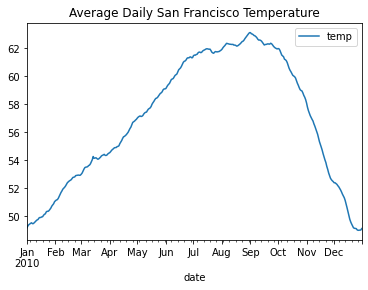

In [18]:
temp_by_day_graph = sf_temp_by_day[['temp']].plot()
labels = temp_by_day_graph.set(title = "Average Daily San Francisco Temperature")

### Exercise 3

Write the code necessary to visualize the minimum temperature over time.

In [19]:
sf_minimum_temp_by_day = sf_temps.resample('D').min()

In [20]:
sf_minimum_temp_by_day.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


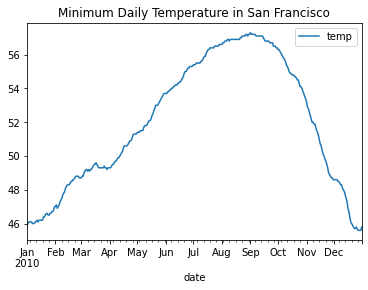

In [23]:
minimum_temp_by_day_graph = sf_minimum_temp_by_day[['temp']].plot()
labels = minimum_temp_by_day_graph.set(title = "Minimum Daily Temperature in San Francisco")

### Exercise 2

Write the code necessary to visualize the maximum temperature over time.

In [24]:
sf_maximum_temp_by_day = sf_temps.resample('D').max()

In [25]:
sf_maximum_temp_by_day.head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


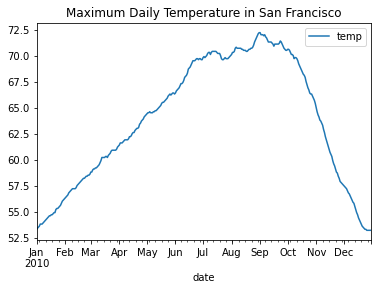

In [26]:
maximum_temp_by_day_graph = sf_maximum_temp_by_day[['temp']].plot()
labels = maximum_temp_by_day_graph.set(title = "Maximum Daily Temperature in San Francisco")

### Exercise 4

Which month is the coldest, on average?

In [59]:
sf_avg_temp_by_month = sf_temps.resample('1m').mean()

In [60]:
sf_avg_temp_by_month

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [61]:
sf_avg_temp_by_month['month'] = sf_avg_temp_by_month.index.month_name()

In [62]:
sf_avg_temp_by_month = sf_avg_temp_by_month.set_index('month')

In [63]:
sf_avg_temp_by_month

,temp
month,
January,49.984140
February,52.243899
March,53.956528
April,55.633056
May,57.970968
June,60.444722
July,61.765457
August,62.405376
September,62.487083


In [64]:
sf_avg_temp_by_month[sf_avg_temp_by_month.temp == sf_avg_temp_by_month.temp.min()]

,temp
month,
January,49.98414


January on average has the lowest temperature in San Francisco.

### Exercise 5

Which month has the highest average temperature?

In [65]:
sf_avg_temp_by_month

,temp
month,
January,49.984140
February,52.243899
March,53.956528
April,55.633056
May,57.970968
June,60.444722
July,61.765457
August,62.405376
September,62.487083


In [66]:
sf_avg_temp_by_month[sf_avg_temp_by_month.temp == sf_avg_temp_by_month.temp.max()]

,temp
month,
September,62.487083


September has on average the highest temperature in San Francisco.

### Exercise 6 

In [103]:
sf_min_max_temp_by_day = sf_temps.resample('1d').agg(['min', 'max'])

In [104]:
sf_min_max_temp_by_day.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [105]:
sf_min_max_temp_by_day['temperature_variability'] = sf_min_max_temp_by_day.temp['max'] - sf_min_max_temp_by_day.temp['min']

In [476]:
sf_min_max_temp_by_day.head()

temp       temperature_variability
             min   max                        
date                                          
2010-01-01  45.8  53.3                     7.5
2010-01-02  46.0  53.4                     7.4
2010-01-03  46.1  53.5                     7.4
2010-01-04  46.1  53.6                     7.5
2010-01-05  46.1  53.8                     7.7

In [107]:
sf_temp_variability_by_day = sf_min_max_temp_by_day.drop(columns = ["temp"])

In [108]:
sf_temp_variability_by_day.head()

,temperature_variability
,
date,
2010-01-01,7.5
2010-01-02,7.4
2010-01-03,7.4
2010-01-04,7.5
2010-01-05,7.7


In [109]:
avg_temp_variability_by_month = sf_temp_variability_by_day.resample('M').mean()

In [110]:
avg_temp_variability_by_month

,temperature_variability
,
date,
2010-01-31,8.341935
2010-02-28,9.485714
2010-03-31,10.854839
2010-04-30,12.320000
2010-05-31,12.909677
2010-06-30,13.950000
2010-07-31,13.977419
2010-08-31,13.870968


In [111]:
avg_temp_variability_by_month['month'] = avg_temp_variability_by_month.index.month_name()
avg_temp_variability_by_month = avg_temp_variability_by_month.set_index('month')

In [112]:
avg_temp_variability_by_month 

,temperature_variability
,
month,
January,8.341935
February,9.485714
March,10.854839
April,12.320000
May,12.909677
June,13.950000
July,13.977419
August,13.870968


In [113]:
avg_temp_variability_by_month[avg_temp_variability_by_month.temperature_variability == avg_temp_variability_by_month.temperature_variability.max()] 

,temperature_variability
,
month,
September,14.403333


In San Francisco, September has on average the highest daily temperature variability. 

### Exercise 7 

**Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [477]:
sf_min_max_temp_by_day.head()

temp       temperature_variability
             min   max                        
date                                          
2010-01-01  45.8  53.3                     7.5
2010-01-02  46.0  53.4                     7.4
2010-01-03  46.1  53.5                     7.4
2010-01-04  46.1  53.6                     7.5
2010-01-05  46.1  53.8                     7.7

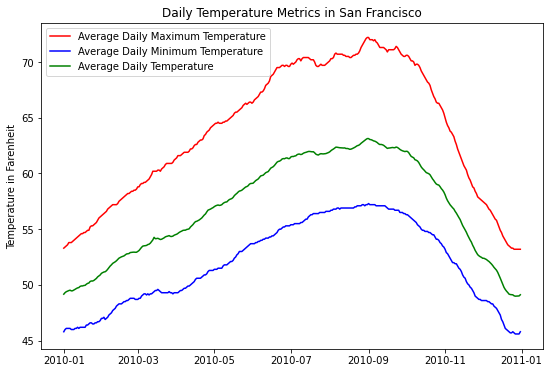

In [179]:
fig, ax = plt.subplots(figsize=(9, 6))


ax.plot(sf_maximum_temp_by_day[['temp']], color = 'red', label = "Average Daily Maximum Temperature")
ax.plot(sf_minimum_temp_by_day[['temp']],color = 'blue', label = "Average Daily Minimum Temperature")
ax.plot(sf_temp_by_day[['temp']], color = 'green', label = "Average Daily Temperature")

lengd = ax.legend()
labels = ax.set(ylabel = "Temperature in Farenheit", title = "Daily Temperature Metrics in San Francisco")

## Seattle Weather

In [329]:
seattle_weather = data.seattle_weather()
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Exercise 1 

Which year and month combination has the highest amount of precipitation?

In [330]:
daily_precipitation = seattle_weather.drop(columns = ['temp_max', 'temp_min', 'wind', 'weather'])

In [331]:
daily_precipitation = daily_precipitation.set_index('date')

In [478]:
daily_precipitation.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


In [332]:
precipitation_by_month = daily_precipitation.resample('M').sum()

In [333]:
precipitation_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [334]:
precipitation_by_month['month'] = pd.to_datetime(precipitation_by_month.index, format='%m%Y', errors='coerce').to_period('m')
precipitation_by_month = precipitation_by_month.set_index("month")

In [234]:
precipitation_by_month

,precipitation
month,
2012-01,173.3
2012-02,92.3
2012-03,183.0
2012-04,68.1
2012-05,52.2
2012-06,75.1
2012-07,26.3
2012-08,0.0
2012-09,0.9


In [235]:
precipitation_by_month[precipitation_by_month.precipitation == precipitation_by_month.precipitation.max()]

,precipitation
month,
2015-12,284.5


December 2015 had over the greatest total amount of rainfall. 

### Exercise 2 

Visualize the amount of monthly precipitation over time.

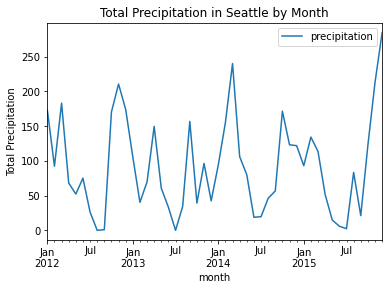

In [238]:
monthly_precipitation = precipitation_by_month.plot()
labels = monthly_precipitation.set(title = "Total Precipitation in Seattle by Month", ylabel = "Total Precipitation")

### Exercise 3 

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [480]:
daily_wind = seattle_weather.drop(columns = ['temp_max', 'temp_min', 'precipitation', 'weather'])

In [481]:
daily_wind.head()

,date,wind
0,2012-01-01,4.7
1,2012-01-02,4.5
2,2012-01-03,2.3
3,2012-01-04,4.7
4,2012-01-05,6.1


In [243]:
daily_wind = daily_wind.set_index('date')

In [244]:
wind_by_month = daily_wind.resample('M').mean()

In [245]:
wind_by_month

,wind
date,
2012-01-31,3.900000
2012-02-29,3.903448
2012-03-31,4.248387
2012-04-30,3.373333
2012-05-31,3.354839
2012-06-30,3.083333
2012-07-31,2.877419
2012-08-31,2.829032
2012-09-30,2.646667


In [246]:
wind_by_month['month'] = pd.to_datetime(wind_by_month.index, format='%m%Y', errors='coerce').to_period('m')
wind_by_month = wind_by_month.set_index("month")

In [247]:
wind_by_month

,wind
month,
2012-01,3.900000
2012-02,3.903448
2012-03,4.248387
2012-04,3.373333
2012-05,3.354839
2012-06,3.083333
2012-07,2.877419
2012-08,2.829032
2012-09,2.646667


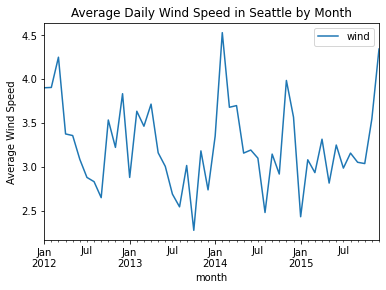

In [249]:
average_monthly_wind = wind_by_month.plot()
labels = average_monthly_wind.set(title = "Average Daily Wind Speed in Seattle by Month", ylabel = "Average Wind Speed")

### Exercise 4

Which year-month combination is the windiest?

In [250]:
wind_by_month[wind_by_month.wind == wind_by_month.wind.max()]

,wind
month,
2014-02,4.528571


February 2014 had the highest average wind speed.

### Exercise 5

In [295]:
weather_type = seattle_weather.drop(columns = ['temp_max', 'temp_min', 'wind', 'precipitation'])

In [296]:
weather_type = weather_type.set_index('date')

In [297]:
weather_type

,weather
date,
2012-01-01,drizzle
2012-01-02,rain
2012-01-03,rain
2012-01-04,rain
2012-01-05,rain
...,...
2015-12-27,fog
2015-12-28,fog
2015-12-29,fog


In [298]:
sunny_days = weather_type[weather_type.weather == "sun"]

In [299]:
sunny_day_counts = sunny_days.resample('Y').count()

In [300]:
sunny_day_counts

,weather
date,
2012-12-31,118
2013-12-31,205
2014-12-31,211
2015-12-31,180


In [301]:
sunny_day_counts['year'] = pd.to_datetime(sunny_day_counts.index, format='%m%Y', errors='coerce').to_period('Y')
sunny_day_counts = sunny_day_counts.set_index("year")
sunny_day_counts = sunny_day_counts.rename(columns = {"weather": "Total Sunny Days"})

In [302]:
sunny_day_counts 

,Total Sunny Days
year,
2012,118
2013,205
2014,211
2015,180


In [304]:
sunny_day_counts[sunny_day_counts["Total Sunny Days"] == sunny_day_counts["Total Sunny Days"].max()]

,Total Sunny Days
year,
2014,211


Of the four years in our datset, 2014 was the sunniest year.

### Exercise 6 

In which month does it rain the most?

In [335]:
precipitation_by_month

,precipitation
month,
2012-01,173.3
2012-02,92.3
2012-03,183.0
2012-04,68.1
2012-05,52.2
2012-06,75.1
2012-07,26.3
2012-08,0.0
2012-09,0.9


In [336]:
precipitation_by_month['month_name'] = precipitation_by_month.index.to_timestamp()
precipitation_by_month['month_name'] = precipitation_by_month.month_name.dt.month_name()

In [337]:
precipitation_by_month

,precipitation,month_name
month,,
2012-01,173.3,January
2012-02,92.3,February
2012-03,183.0,March
2012-04,68.1,April
2012-05,52.2,May
2012-06,75.1,June
2012-07,26.3,July
2012-08,0.0,August
2012-09,0.9,September


In [343]:
average_rain_by_month = precipitation_by_month.groupby('month_name').mean()

In [344]:
average_rain_by_month

,precipitation
month_name,
April,93.850
August,40.925
December,155.675
February,105.500
January,116.500
July,12.050
June,33.225
March,151.550
May,51.875


In [345]:
average_rain_by_month[average_rain_by_month.precipitation == average_rain_by_month.precipitation.max()]

,precipitation
month_name,
November,160.625


In our four year time period, November was the month that receives on average the most precipitation in Seattle. 

### Exercise 7

Which month has the most number of days with a non-zero amount of precipitation?

In [347]:
daily_precipitation.head()

,precipitation
date,
2012-01-01,0.0
2012-01-02,10.9
2012-01-03,0.8
2012-01-04,20.3
2012-01-05,1.3


In [348]:
days_with_rain = daily_precipitation[daily_precipitation.precipitation != 0]

In [356]:
rainy_day_counts_by_year =  days_with_rain.resample('Y').count()

In [357]:
rainy_day_counts_by_year

,precipitation
date,
2012-12-31,177
2013-12-31,152
2014-12-31,150
2015-12-31,144


In [358]:
rainy_day_counts_by_year = rainy_day_countys_by_year.rename(columns = {"precipitation" : "days with precipitation"})

In [360]:
rainy_day_counts_by_year

,days with precipitation
date,
2012-12-31,177
2013-12-31,152
2014-12-31,150
2015-12-31,144


In [361]:
rainy_day_counts_by_year['year'] = pd.to_datetime(rainy_day_counts_by_year.index, format='%m%Y', errors='coerce').to_period('Y')
rainy_day_counts_by_year= rainy_day_counts_by_year.set_index("year")

In [362]:
rainy_day_counts_by_year

,days with precipitation
year,
2012,177
2013,152
2014,150
2015,144


In [365]:
rainy_day_counts_by_year[rainy_day_counts_by_year['days with precipitation'] == rainy_day_counts_by_year['days with precipitation'].max()]

,days with precipitation
year,
2012,177


Of the four years of data for Seattle weather in our dataset, the year 2012 had the most days with a non-zero amount of precipitation.

## Flight Data

In [367]:
flights = data.flights_20k()

In [369]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### Exercise 1

Convert any negative delays to 0.

In [375]:
flights.delay[flights.delay < 0] = 0 

In [376]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### Exercise 2

Which hour of the day has the highest average delay?


In [484]:
flight_delay = flights.drop(columns = ["distance", "origin", "destination"])

In [485]:
flight_delay = flight_delay.set_index("date")

In [486]:
flight_delay.head()

,delay
date,
2001-01-13 14:56:00,32
2001-01-31 16:40:00,0
2001-02-11 18:39:00,3
2001-01-10 21:00:00,0
2001-03-30 21:45:00,0


In [487]:
flight_delay['hour'] = flight_delay.index.hour

In [490]:
flight_delay.head()

,delay,hour
date,,
2001-01-13 14:56:00,32,14
2001-01-31 16:40:00,0,16
2001-02-11 18:39:00,3,18
2001-01-10 21:00:00,0,21
2001-03-30 21:45:00,0,21


In [489]:
delays_by_hour = flight_delay.groupby('hour').mean()

In [389]:
delays_by_hour

,delay
hour,
0,127.916667
1,170.000000
3,302.500000
5,0.513514
6,2.494856
7,3.071932
8,4.030483
9,5.002504
10,5.850953


In [391]:
delays_by_hour[delays_by_hour.delay == delays_by_hour.delay.max()]

,delay
hour,
3,302.5


The hour three o'clock in the morning has the most delays.

### Exercise 3

Does the day of the week make a difference in the delay amount?


In [491]:
flight_delay = flight_delay.drop(columns = ['hour'])

In [492]:
flight_delay.head()

,delay
date,
2001-01-13 14:56:00,32
2001-01-31 16:40:00,0
2001-02-11 18:39:00,3
2001-01-10 21:00:00,0
2001-03-30 21:45:00,0


In [395]:
flight_delay['weekday'] = flight_delay.index.day_name()

In [493]:
flight_delay.head()

,delay
date,
2001-01-13 14:56:00,32
2001-01-31 16:40:00,0
2001-02-11 18:39:00,3
2001-01-10 21:00:00,0
2001-03-30 21:45:00,0


In [397]:
flight_delay.groupby("weekday").mean()

,delay
weekday,
Friday,17.757596
Monday,7.165772
Saturday,8.431498
Sunday,10.413542
Thursday,12.821322
Tuesday,9.410866
Wednesday,11.032478


In [398]:
flight_delay.groupby("weekday").median()

,delay
weekday,
Friday,5
Monday,0
Saturday,0
Sunday,0
Thursday,2
Tuesday,0
Wednesday,0


Yes the delay amount varies significantly by weekday. Friday has the longest delays on average, wheres Monday has the shortest. 

### Exercise 6 

Does the month make a difference in the delay amount?

In [402]:
flight_delay['month'] = flight_delay.index.month_name()

In [404]:
flight_delay.head()

,delay,weekday,month
date,,,
2001-01-13 14:56:00,32,Saturday,January
2001-01-31 16:40:00,0,Wednesday,January
2001-02-11 18:39:00,3,Sunday,February
2001-01-10 21:00:00,0,Wednesday,January
2001-03-30 21:45:00,0,Friday,March


In [405]:
flight_delay.groupby("month").mean()

,delay
month,
February,12.306106
January,11.301592
March,9.875287


In [406]:
flight_delay.groupby("month").median()

,delay
month,
February,0
January,0
March,0


We only have data for the months January, February, and March in 2001. Of those months, February had the longest  delays on average, followed by January. March had the shortest delays on average.

## Iowa Electricity Data

In [448]:
iowa_electricity = data.iowa_electricity()

In [449]:
iowa_electricity.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


### Exercise 1

For each row, calculate the percentage of the year's total that energy source provided.

In [450]:
iowan_electricity = iowa_electricity.set_index("year")

In [451]:
iowan_electricity.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2002-01-01,Fossil Fuels,35991
2003-01-01,Fossil Fuels,36234
2004-01-01,Fossil Fuels,36205
2005-01-01,Fossil Fuels,36883


In [452]:
iowan_electricity['total'] = iowan_electricity.groupby('year').sum()

In [453]:
iowan_electricity.head()

,source,net_generation,total
year,,,
2001-01-01,Fossil Fuels,35361,40651
2002-01-01,Fossil Fuels,35991,42528
2003-01-01,Fossil Fuels,36234,42107
2004-01-01,Fossil Fuels,36205,43236
2005-01-01,Fossil Fuels,36883,44145


In [454]:
iowan_electricity['percentage_of_total'] = iowan_electricity['net_generation']/iowan_electricity['total']

In [455]:
iowan_electricity.head()

,source,net_generation,total,percentage_of_total
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2002-01-01,Fossil Fuels,35991,42528,0.846290
2003-01-01,Fossil Fuels,36234,42107,0.860522
2004-01-01,Fossil Fuels,36205,43236,0.837381
2005-01-01,Fossil Fuels,36883,44145,0.835497


### Exercise 2 

Lineplot of generation over time, color by source.

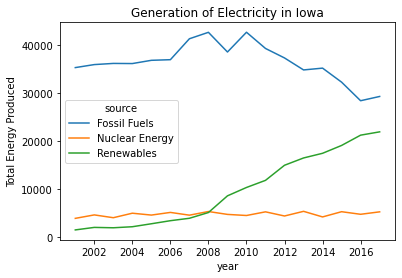

In [456]:
iowa_power_generation = sns.lineplot(data = iowan_electricity, x = iowan_electricity.index, y = iowan_electricity.net_generation, hue = "source")
labels = iowa_power_generation.set(title = "Generation of Electricity in Iowa", ylabel = "Total Energy Produced")

### Exercise 3

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [459]:
source_by_time = pd.pivot_table(iowa_electricity, index=[iowa_electricity.source], columns = "year")

In [460]:
source_by_time

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01   
source                                                                  
Fossil Fuels        37014      41389      42734      38620      42750   
Nuclear Energy       5095       4519       5282       4679       4451   
Renewables           3364       3870       5070       8560      10308   

                                                                       \
year           2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01   
source                                                                  
Fossil Fuels        39361      37379      34873      35250      32319   
Nuclear Energy       5215       4347       5321       4152       5243   
Renewables          11795      14949      16476      17452      19091   

                                      
year           2016-01-01 2017-01-01  
source                                
Fossil Fuels        28437      29329  
Nuclear Energy       4703       5214  
Renewables          21241      21933

### Exercise 4

Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

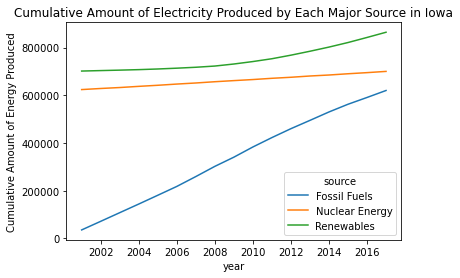

In [470]:
iowa_power_generation_cumulative = sns.lineplot(data = iowan_electricity, x = iowan_electricity.index, y = iowan_electricity.net_generation.cumsum(), hue = "source")
labels = iowa_power_generation_cumulative.set(title = "Cumulative Amount of Electricity Produced by Each Major Source in Iowa", ylabel = "Cumulative Amount of Energy Produced")

### Exercise 5 

- Is the total generation increasing over time?

- How would you control for increasing consumption over time when considering how much energy is coming from each source?

- express each number as a % of the year's total

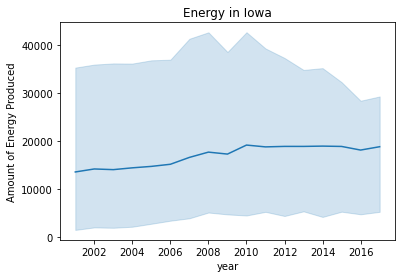

In [474]:
iowa_power_generation_cumulative = sns.lineplot(x = iowan_electricity.index, y = iowan_electricity.net_generation)
labels = iowa_power_generation_cumulative.set(title = "Energy in Iowa", ylabel = "Amount of Energy Produced")

The total amount of energy produced appears to have a slight upward slope, although growth appears mostly stagnant. 

To control for increasing consumption, I would divide the energy produced each year by the consumption rates for each year. 

## San Francisco Temperature, Revisited

### Exercise 1
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [494]:
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [506]:
pd.qcut(sf_temps.temp, 4).head()

date
2010-01-01 00:00:00    (45.599000000000004, 52.3]
2010-01-01 01:00:00    (45.599000000000004, 52.3]
2010-01-01 02:00:00    (45.599000000000004, 52.3]
2010-01-01 03:00:00    (45.599000000000004, 52.3]
2010-01-01 04:00:00    (45.599000000000004, 52.3]
Name: temp, dtype: category
Categories (4, interval[float64]): [(45.599000000000004, 52.3] < (52.3, 56.5] < (56.5, 60.7] < (60.7, 72.2]]

In [497]:
sf_temps['category'] = pd.qcut(sf_temps.temp, 4, labels=["cold", "cool", "warm", "hot"])

In [498]:
sf_temps.head()

,temp,category
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


### Exercise 3

How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [499]:
sf_temps.category.value_counts()

cool    2218
cold    2210
hot     2175
warm    2156
Name: category, dtype: int64

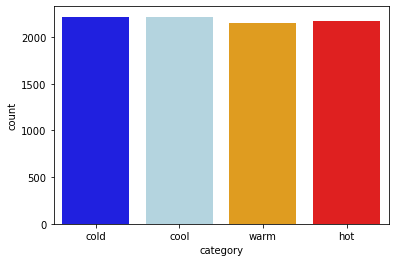

In [503]:
days_by_category = sns.countplot(sf_temps.category, palette = ['blue', 'lightblue', 'orange', 'red'])